
<img src="imgs/chi2019_logo_final.png">

# Bayesian Methods in HCI


$$\newcommand{\vec}[1]{{\bf #1} } 
\newcommand{\real}{\mathbb{R} }
\newcommand{\expect}[1]{\mathbb{E}[#1] }
\DeclareMathOperator*{\argmin}{arg\,min}
$$

## Outline

* Part 1: Introduction to Bayesian Interaction and probabilistic filtering [John Williamson]
* Part 2: Probabilistic symbol decoding [Per Ola Kristensson]
* Part 3: Bayesian optimisation for HCI [Antti Oulasvirta]
* Part 4: Modeling behaviour using graphical models [Nikola Banovic]

----

## John H. Williamson 

* JohnH.Williamson@glasgow.ac.uk
* [johnhw.com](johnhw.com)
* jhnhw / Twitter
* johnhw / GitHub



# What is Computational Interaction?
**Computational interaction** applies computational thinking (abstraction, automation, analysis) to explain and enhance interaction between a user and a system. It is underpinned by modelling which admits formal reasoning, and which is amenable to computational approaches.


<img src="imgs/comp_interaction_book.jpg">

*[Edited by Antti Oulasvirta, Per Ola Kristensson, Xiaojun Bi, and Andrew Howes]*


Computational interaction draws on insight from:
* machine learning;
* signal processing;
* information theory;
* optimisation;
* Bayesian inference;
* control theory;
* and formal modelling.

It emphasises generating motor themes in HCI, and robust, replicable and durable approaches which go beyond point sampling of the interaction space.

### Computational interaction would typically involve at least one of:
* I. an explicit mathematical model of user-system behavior;
* II. a way of updating that model with observed data from users;
* III. an algorithmic element that, using this model, can directly synthesise or adapt the
design;
* IV. a way of automating and instrumenting the modeling and design process;
* V. the ability to simulate or synthesise elements of the expected user-system behavior.

Computational interaction often involves elements from machine learning, signal processing, information theory,
optimisation, inference, control theory and formal modelling.



## Bayesian Interaction

A Bayesian:

* Represents belief using probability distributions
* Updates belief using Bayes' Rule, combining a prior belief with observed evidence
* Infers conditional distributions over unseen parameters 

View: we don't know what the world is like, but we can write down a model that describes how it might behave -- a simulation that could generate data -- characterised by a collection of parameters. Given some idea about what values parameters could take on, expressed as a (prior) probability distribution, we can then use evidence observed to concentrate belief on more likely parameter configurations.



## Bayesian methods in HCI

Bayesians use probability to describe beliefs about the world. Bayesian methods have application throughout virtually of all of HCI, but are often only encountered in a few specialised niches; for example in speech recognition. There are a wide variety of areas where Bayesian methods can be directly *used* in HCI, three of the most obvious being:

* **Bayesian methods in empirical analysis** (i.e. Bayesian statistics for experiments): Bayesian analysis offers a potentially superior way of analysing some kinds of quantitative experimental work that arise in HCI. It can directly answer questions of interest, and can incorporate first-principles models from domain experts. There are opportunities for novel experimental designs (e.g. online Bayesian experimental design) and meta-analyses that can offer insights into interaction problems. The advance of easy-to-use packages for Bayesian inference (e.g. Stan) makes this practical for researchers.

<img src="imgs/ymxc_stochastic.png">
<img src="imgs/sampled_posterior_predictive.png">

* **Bayesian methods in optimisation**: Bayesian optimisation can be used to optimise functions which are not easy to evaluate, or are noisy to evaluate, for example using Gaussian Processes as proxy functions. This is typically the case in optimisation with observations from users, who are expensive to measure, noisy and not governed by simple mathematical formulae. This can range from simple Bayesian A/B testing to sophisticated modelling of user behaviour at a fine level of granularity. Bayesian optimisation can be applied to a huge range of problems with expensive or noisy functions, from inferring subjective preferences to optimising touch sensor configurations.

<img src="imgs/bayesian_optimization.jpeg"> 

*[From the emukit documentation: https://amzn.github.io/emukit/bayesian-optimization/]*

* **Bayesian methods in input decoding**: Bayesian methods can be used to represent the problem of the interface itself -- how does information flow from human to computer? This can be used to derive robust models based around inference of intention. Strong prior models of what we expect users to do allow us to extract maximum value from user actions and preserve and use uncertainty about user intent. This is a philosophy of interaction founded in the idea of the interface as a concentrator of belief, whose mechanics are driven by the logic of probability.

<img src="imgs/capture.png" width="50%">

*[Bayesian inference of gesture recognition]*


There are other topics where Bayesian ideas have bearing on problems in interaction design, including:
* **Interaction with Bayesian models**, that is how to explain, explore, understand and make help users make rational decisions with probabilistic computational models (see e.g. [Explorable Multiverse Analyses](https://explorablemultiverse.github.io/)). This is a problem of communicating distributions from systems to users.

* **Bayesian models of human behaviour** which seek to explain user behaviour, from low-level motor actions and perceptual functions through to decision making as approximate Bayesian inference. 


# Bayesian filtering for intention inference

#### Inferring user intention in a noisy world
----

    All theorems are true. 
    All models are wrong. 
    And all data are inaccurate. 

    What are we to do? 
    We must be sure to remain uncertain.

-- *[Leonard A. Smith, Proc. International School of Physics ``Enrico Fermi", (1997)](http://www2.maths.ox.ac.uk/~lenny/fermi96_main_abs.html)* 

## Topic purpose

This section will cover probabilistic **inference**. Rather than learning a single set of parameters by optimisation, we can infer probability distributions over possible configurations of models that might be compatible with our data. Our "models" will be representations of user intentions, and the processes that transduce intention into sensor measurement.

We will develop the idea of **probabilistic filtering** to rigorously define the interaction problem as online probabilistic inference over time, and derive practical algorithms that can be fuse together input device signals across time and across sensors channels. This will give us a robust, theoretically underpinned way of combining together sensing into estimates of intention.



### Why is this relevant for computational HCI?
* We will build **statistical models** of user behavior, and estimate parameters of that model from quantitative observations of data. 
* This is a **model-led approach** which has a rich mathematical underpinning and many powerful algorithmic tools which can be brought to bear.
* This is **robust** (it appropriately represents uncertainty) and **generative** (it can simulate behaviour compatible with observations).  
* There is an extensive mathematical framework to support our interfaces, as well as powerful software tools to implement these ideas.


## Outline of this module [80 minutes]

### Interaction is inference
* Show how to represent interaction problems as inference and discuss how probabilistic filters can be used to attack these inference problems 
* Discuss *alternative* approaches to solving interaction problems (what would you do if you were not Bayesian?)


### Probability refresher
* Introduce random variables and distributions 
* Outline Bayesian inference 
* Show how Bayesian inference can be used to fuse data across time and across sensors 


### Probabilistic filters
* Introduce the basic terminology for probabilistic filters
* Discuss principles behind probabilistic tracking of belief 
* Discuss how to frame HCI problems in terms of probabilistic filtering
* Practical example of tracking with probabilistic filters


------

# Principles 
-------




> Interaction is the process of driving a system into a state compatible with user intentions.

<img src="imgs/brainspace.png" width="100%">

Note that we focus here on the problem of **input**; getting a computer to do what we want. We will touch on the problem of **feedback** where we aligning users with the processes mediating this input using some form of display. However, we will not consider the **display** problem, where we try to efficiently inject information from a computer into a user's mind.


There are many perspectives on interaction that arise from this stance, including:

| Perspective   | Burden | Characteristic                         |
|---------------|--------|----------------------------------------|
| Communication | User   | User gets information into the system, by encoding intentions. |
| Control       | Split  | User drives state towards intention via feedback control.   |
| Inference     | System | System infers what user intention is from sensed user actions. |

### Interaction as inference
If we view interaction as inference of intention, there are three elements:
* **Interaction is inference**; it is the process of inferring a distribution over a hidden variable: what the user wants a system to do. 
* **Observations are noisy and incomplete** What a system sees is a distorted and incomplete representation of user actions in the world, which are in turn a noisy representation of internal intentions (your hand does not always go where you want it...)
* **Interaction occurs over time** Interaction is a *process* that evolves over time. Information flow is not instantaneous. Observations must be fused together to update a beliefs.

### Optimal mindreading
We'll look at a **Bayesian** approach to modelling human computer interaction, where we explicitly model what might be going on inside a user's mind and use Bayesian methods to try and perform "optimal mindreading".

<img src="imgs/brain_inference.png">

# Interaction as inference: concentrating belief
One view on interaction is to see user intentions as **unknown values** which are partially observed through input sensors. The time series of inputs from the user only give a partial, noisy, incomplete view of intention inside the user's head. We try and explain what is going on inside a user using a *generative model* which is a simplified representation of what goes on inside a user's head and how it is mediated and transformed by the world. The better model we have available, the more effectively we can infer intention.

> In this view, improving interaction (or at least *input*) comes down to more efficiently concentrating probability density where a user wants it. A better pointing device reduces uncertainty faster; a better display helps a user understand how best to target future actions to concentrate belief as desired; a better model of the user intentions concentrates belief with less explicit effort on the part of a user.

<img src="imgs/contraction_probability.png">



## Partitioning the inferred variables

We can further partition the problem. The causes of observed evidence can be factored, for example, into:
* **Mind state** The parameters of the intentions that generate the behaviour: what menu option does the user want?
* **Body state** The parameters of the motor system that generate movement: where is the user's hand?
* **Sensor state** The parameters of the sensing system that generates signals: what is the camera matrix?

$$P(X_{\text{intention}}, X_{\text{motor}}, X_{\text{sensing}}|Y)$$

[Betancourt's article on probabilistic modeling](https://betanalpha.github.io/assets/case_studies/modeling_and_inference.html) expresses these ideas in terms of the "phenomenon" (intention), "environment" (motor/world system) and "probe" (sensing/interface context).

---


# Probabilistic filtering
We'll specifically look at probabilistic filtering, which is just Bayesian updating over time. There are a collection of algorithms for doing so efficiently.  Probabilistic filtering **(PF)** tracks the evolution of some unknown variables *[user intentions]* given observed evidence *[user input]*, in a way that is **robust**. Probabilistic filters infer a **distribution** over possible hidden (unobserved) variables, updating them over time. These filters are:
* inherently **uncertain**, as they represent degrees of belief as probability distributions over states
* and **dynamic**, as they explicitly model changing state over time.



### Properties
Probabilistic filtering is:

| Property | Why  |
|----------|------|
|**Bayesian**  |  Represents degrees of belief using probability distributions.    |
|**predictive**  |  Works by comparing predictions with reality.   |
|**generative** |  Involves generating (i.e. simulating) behavior.   |

-----
Probabilistic filtering is an **inverse probability** approach, and it requires that we think of interaction from an unique perspective. We have to explicitly be able to write down:

* what we want to know (i.e. the **state space of intention**), which describes intentions that might give rise to observed behaviour;
* how that will change over time (i.e. the **dynamics of intention**);
*  a model that *if we knew what the user intention was, what the expected behavior would be* (i.e. a **generative function mapping intention -> expected user inputs as observed by a sensor**).

Note that this is the **inverse** of the typical way of approaching this problem, where we would try and find a mapping from a sensors to intention, by design or by learning. Instead, we propose that we can postulate intentions, and look for evidence that might favour some underlying intentions over others. This can be a subtle and powerful way of distinguishing intentions who are poorly represented in observed signals.


### Simulation viewpoint
These filters are really *simulators*. They *simulate* how possible user behaviors might unfold over time. In some probabilistic filters, hundreds of parallel simulators are run, each with slightly different parameters. In all cases, the simulations are adjusted online to better match observed reality. The internal parameters that drive the simulation are the *unknown variables* we want to infer and the *evidence* is the observed reality that adjusts the simulation parameters.


### Why is this computational HCI?
Probabilistic filtering means writing down an **executable, statistical model** of user behavior, then **running an inference algorithm** that updates beliefs based on the way observations evolve. The **parameters** of the filter can be **learned from user data**. The effectiveness of the filter can be quantitatively measured.

---
### What are competitive approaches?
#### **Crafted mappings**
**where we try to find (by hand) transforms from sensors to intentions that are  simple or obvious.**

**Example:** a button, which has two physical states, and maps on to two intentional states via two electrical states. Pushed down = current flows = user intended to switch on. The mapping from electrical states to intentional states is **designed.**

This is is explicit design, which often puts the burden of mapping states <=> intentions on the user. Users have to learn to encode their intentions in physical actions which hopefully correspond "intuitively" with the crafted mappings that have been set up to detect them.

<img src="imgs/undo.jpg">

*[Image credit: David Singleton via flickr.com CC-BY 2.0]*

#### **Machine learned mappings**
**where we train a system to recognize a class of input patterns as being representative of an intended behavior.**

**Example:** Finger gesture recognizer; hundreds of examples of many users performing one of N multi-touch gestures are recorded. These are used to train a random forest to classify the intended gesture. The mapping from electrical states (capacitive sensors) to intentional states is **learned**.

This reduces the burden on the user to learn a specific mapping and instead adapts to behaviours exhibited by real users with real input devices. But it can suffer with issues in generalisation and robustness, and is often very hard to combine with known first-principles models (e.g. users can't change the size of their fingers!)

<img src="imgs/svm.jpg" width="300px">

*[Image credit: Elisfm - via Wikimedia Commons; public domain]*


## Benefits of a probabilistic filtering approach

Probabilistic filtering has a number of motivating properites that make it worth studying:

### Stronger modelling
* **Easy to incorporate priors** Prior knowledge is naturally and easily expressed. We write down a "simulator" that behaves  according to mechanics we can arbitrarily define and can build upon what we know about the world.
* **Flexible modeling** PFs can incorporate both fundamental modeling (e.g. physiological or cognitive models) and data-driven machine learning.
* **Easy to balance modelling with learning** We can fuse both learned components with prior models, either to efficiently emulate complex processes via learned surrogates, or to capture models for which we lack strong first-principles views.

### Robust
* **Robustness to noise** PFs can work well even with input sensors that are noisy.
* **Robustness to poorly specified models** PFs can cope predictably even if our models are bad.
* **Robustness to intermittence** PFs can continue to sensibly interpolate when input cuts out.

### Decoupled

* **Decoupled from real-time** PFs can infer past (smoothing), present (filtering) and future (forecasting).
* **Inherent fusion of multiple input sensors** PFs are often used to solely to fuse together multiple inputs from different sensors.

### Reflective
* **Uncertainty estimates** PFs *know how certain they are* and this can be used in the interaction design.
* **Better feedback** PFs  offer the opportunity to give users rich insight into the process of intention decoding.

---

## Drawbacks

* Computational demands can be heavy, especially compared to black box prediction models.
* Speeding up inference may require more sophisticated statistical models, and this can get tricky quickly.
* If you **don't** have good models, then it may be easier to just learn from data, or force users to adapt to a design.
* Distributions are not natural for users. Representing these so users understand what is going on can be tricky.
* Rules have to be defined to turn inference into action, typically involving some form of utility function to make decisions. 




----


# Probability refresher

## Random variables and distributions
A **random variable** $X$ is a variable that can take on different values, but we do not know what value it has; i.e. one that is "unassigned". However, we have knowledge which captures the possible states the variable could take on, and their corresponding probabilities, which is encoded in the **distribution** of that variable. Probability theory allows us to manipulate random variables without having to assign them a specific value.

A random variable might represent:

* the outcome of dice throw (discrete), i.e. over the set of outcomes $\{1,2,3,4,5,6\}$; 
* whether or not it is raining outside (discrete: binary), over the set of outcomes $\{\text{heads}, \text{tails}\}$; 
* the height of person we haven't met yet (continuous), over the set of outcomes $\real$; 
* the position of a user's hand (continuous, multi-dimensional), over the set of outcomes $\real^3$. 

## Distributions
A **probability distribution** defines how likely different states of a random variable are. 

We can see $X$ as the the *experiment* and $x$ as the *outcome*, with a function mapping every possible outcome to a probability. We write $P(x)$ to mean the probability of $P(X=x)$ (note the case!), that is that $X$ takes on a value $x$.

$$P(X=x),\  \text{the probability of random variable X taking on value x}\\
P(X),\  \text{shorthand for probability of X=x }\\
P(x),\  \text{shorthand for probability of specific value X=x }\\
$$



### Discrete and continuous

The function defining the distribution maps the outcomes of a random variables to real numbers (probabilities) in the range $[0,1]$, subject to the constraint that the sum of all probabilities across all outcomes. These probabilities, in a Bayesian world view, represent belief about how likely different outcomes are. Distributions are defined by functions $f_X(x)$, which give the probability of an outcome $x$ (imagine a dictionary mapping outcomes to probabilities). For technical reasons, these are distinguished for continuous and discrete variables:

* **probability mass function** (PMF),  for discrete variables
* **probability density functions** (PDF),  for continuous variables

### Likelihood and probability
* We talk about the **probability** of outcomes we have not yet observed: how relatively likely are future possible states?
* We talk about the **likelihood** of outcomes we have observed: how likely is the data we have observed to have been generated by the distribution we have? We sometimes write the likelihood of an observation $x$ as $\mathcal{L}(x) = f_X(x)$ and is just evaluated by evaluating the mass/density function at $x$.

## Samples and sampling
**Samples** are observed outcomes of an experiment; we will use the term **observations** to refer to the same thing when samples come from measurements, rather than being simulated. We can **sample** from a distribution; this means simulating outcomes according to the probability distribution of those variables. 

We can talk about the probability of generating a specific sample; and the likelihood of a given observation having being generated.

For discrete random variables, this is easy: we simply produce samples by drawing each outcome according to its probability. (For continuous variables, we need to use specific algorithms to draw samples according to a distribution.)

## Random variables

* Defined over a set of outcomes (e.g. `{heads, tails}` or the real numbers, or the set of `[longitude, latitude, altitude]` tuples, etc.)
* Defined by a function: probability mass/density function, which maps each outcome to a "belief weight" (probability) such that the integral/sum of all weights is 1.0
* Key operations:
    * **Likelihood**, which just evaluates the density/mass function at some value, i.e. evaluating $f_X(x)$ or $P(X=x)$ at some known $x$. We typically want to be able to compute the *log-likelihood*, as a more computationally useful form.    
    * **Sample**, simulating an example from a random variable, i.e. drawing a new random $x$ such that the long-term distribution of many such samples follows the distribution that defines the random variable.

---


We usually want to be able to apply these operations to many values at once.

In [2]:
import numpy as np

# A definition of a probabilty distribution in Python

class DiscreteRandomVariable:
    def __init__(self, pmf):
        self.pmf = pmf        
        
        self.p = np.array(list(pmf.values()))
        # cumulative probabilities of outcomes 
        self.cmf = np.cumsum(self.p)        
        # list of outcomes, in same order as CMF
        self.outcomes = list(pmf.keys())

    def lik(self, outcome):          
        """Return the likelihood of some outcome"""
        return self.pmf[outcome]

    def sample(self, n):
        """Draw a random sample from this random variable"""         
        return [self.outcomes[s] for s in np.digitize(np.random.uniform(0,1,n), self.cmf)]


In [ ]:
coin = DiscreteRandomVariable({"heads":0.5, "tails":0.5})

In [9]:
print("Likelihood of observing heads", coin.lik("heads"))

Likelihood of observing heads 0.5


In [10]:
print("10 random draws from an unbiased coin:\n", "\n".join(coin.sample(10)))

10 random draws from an unbiased coin:
 tails
tails
heads
tails
heads
tails
tails
heads
tails
heads


From this basic idea, we can derive standard operations:
    
* **Expectation** An "average" of a *function* of a random variable. This can be evaluated exactly by integrating over all possible outcomes, and computing the probability of that outcome times the function of that outcome. 
$$\mathbb{E}[f(X)] = \int_x P(X=x) f(x)dx$$

* **Monte Carlo approximation to the expectation**
    Can be computed **approximately** from many samples $x^{(1)}, x^{(2)}, x^{(3)}, \dots$ from $X$ using

    $$\mathbb{E}[f(X)] \approx \frac{1}{N} \sum_i P(X=x^{(i)}) f(x^{(i)})dx$$

* **Log-likelihood** of multiple oobservations Just the logarithm of the likelihood, typically used for numerical convenience, as we can then sum together log-likelihoods, instead of multiplying (small) likelihood values.

$$\log \mathcal{L}(x_1, x_2, \dots) = \log \prod_i P(X=x_i) = \sum_i \log \mathcal{L}(x_i) $$


    

In [16]:

class DRandomVariable(DiscreteRandomVariable):
                
        def llik(self, outcomes):
            """Return the joint log-likelihood of several outcomes; we would usually define this differently
            and obtain the log likelihood *directly* and never use a lik() function, but
            this is convenient for explanation."""
            return np.sum((np.log(self.pmf[outcome]) for outcome in outcomes))
        
        def expectation(self, fn):
            """Return the average value of fn applied to this random variable,
            by summing the products of the function applied to each value and the
            corresponding probability"""
            return sum(fn(outcome)*p for outcome, p in self.pmf.items())

        def mc_expectation(self, fn, n):
            """Approximate an expectation using Monte Carlo; i.e. sample a bunch of examples
            and then compute the average value of those samples. This works even if we
            can't evaluate the probability distribution everywhere (e.g. because it is infinite)."""
            return np.mean([fn(sample) for sample in self.sample(n)])
        
               
            

We can use this to model simple random systems:

In [17]:
coin = DRandomVariable({"heads":0.5, "tails":0.5})
print("Log-likelihood of HHH", coin.llik(["heads", "heads", "heads"]))

Log-likelihood of HHH -2.0794415416798357


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  


We can compute expectations under utility functions:

In [18]:
# this is an arbitrary function that gives 5 "points" 
# for a heads, and -1 points for
# a tails
def value_fn(toss):
    return 5.0 if toss=="heads" else -1.0

print("Expectation under value_fn()", coin.expectation(value_fn))

print("Approx. expectation under value_fn() computed from 100 samples", 
      coin.mc_expectation(value_fn, 100))

Expectation under value_fn() 2.0
Approx. expectation under value_fn() computed from 100 samples 2.24


## What we can we do with this?

* We can **simulate** using the ability to *sample* from a distribution.
* We can **evaluate** using the ability to compute likelihoods of observations.
* We can **score** using the ability to compute expectations of functions of outcomes.

### Applying functions to samples
The use of **samples** to approximate distributions will be central to the approach we will discuss. Since samples are just ordinary values, we can apply any standard functions to them and produce new samples. This has two particular applications:

* If we have samples over a distribution over beliefs *now*, we can define a prediction function that moves the predictions to a time step in the future. We can use this to introducte **dynamics**.

* If we have samples over internal states, and a model of these internal states become observations, we can define an **observation function**, that will predict what we expect to observe. We can use this (in combination with some scoring function) to compute the likelihood of hidden states given observations.



In [10]:
# numpy, scipy
import numpy as np
import scipy.stats
from scipy.stats import norm
import numpy.ma as ma
import time
import IPython

# add our custom scripts
import sys
sys.path.append("src")

# custom packages from src/
import pfilter, gestures

# matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(8.0, 4.0), dpi=80)
plt.style.use("ggplot")


In [11]:
%%html
<style> .output_wrapper .ui-dialog-titlebar { display: none; } </style>

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a id="bayesian"> </a>
## Probability theory and Bayesian inference

#### Probability as a calculus of belief
*Bayesians* treat probability as a **calculus of belief**; in this model of thought, probabilities are measures of degrees of belief. $P(X=x)=0$ means a belief that outcome $x$ can never occur and $P(X=x)=1$ is a belief that outcome $x$ is absolutely certain.belief in its viability.

#### Probability as the optimal way of representing uncertainty
Other representations of uncertainty are strictly inferior to probabilistic methods *in the sense that* a person, agent, computer placing "bets" on future events using probabilistic models has the best possible return out of all decision systems when there is uncertainty. 

*Bayesians* allow for belief in states to be combined and manipulated via the rules of probability. The key process in Bayesian logic is *updating of beliefs*. 

* **Prior** Given some *prior* belief (it's Glasgow, it's not likely to be sunny) 
* and some new **observations** for which we have a likelihood (there seems to be a bright reflection inside, and it is likely to be bright inside if it is sunny)
* **posterior** we can update our belief to calculate the **posterior** -- our new probability that it is sunny outside. Bayesian inference requires that we accept priors over events. 

This implies we must explicitly quantify our *assumptions* with probability distributions. 

#### Prior, likelihood, posterior, evidence

We often want to know the probability of a some outcome $A$ given some other outcome $B$; that is $P(A|B)$. But we are often in the situation that we can only compute $P(B|A)$. 

In general $P(A|B) \neq P(B|A);$

Typically, this type of problem occurs where we:
* want to know the probability of some event given some *evidence* (observations)
* but we only know the probability of the evidence given the event 

**Bayes' rule** gives a consistent way to invert the probability distribution:
$$ \begin{equation} P(A|B) = \frac{P(B|A) P(A)}{P(B)} \end{equation}$$

This follows directly from the axioms of probability. Bayes' Rule is a very important rule, and has some surprising results.

* $P(A|B)$ is called the **posterior** -- what we want to know, or will know after the computation
* $P(B|A)$ is called the **likelihood** -- how likely the $B$ is to be observed given that we believe in $A$ 
* $P(A)$ is the **prior**  -- how likely the $A$ is regardless of evidence
* $P(B)$ is the **marginal likelihood** -- how likely the observation $B$ is regardless of the event.

Bayes' rule gives a consistent rule to take some prior belief and combine it with observed data to estimate a new distribution which combines them.

---

We often phrase this as some **hypothesis** $H$ we want to know, given some **data** $D$ we observe, and we write Bayes' Rule as:
$$ \begin{equation}P(H|D) = \frac{P(D|H) P(H)}{P(D)} \end{equation}$$

(the probability of the hypothesis given the data) is equal to (the probability of the data given the hypothesis) times (the probability of the hypothesis) divided by (the probability of the data).

In other words, if we want to work out how likely a hypothesis is to be true given observations, but we only know how likely we are to have seen those observations if that hypothesis *was* true, we can use Bayes' rule to solve the problem.

## Bayesian interaction

If we look at the problem of **inferring intent**, then:

* We have **evidence** from input devices (e.g. a sequence of mouse movements)
* We have **prior distribution** over a space of intentions (e.g. how likely is it the user wants to select this item?)
* We want to infer the **posterior** distribution over intentions, conditioned on the observed evidence.

In other words -- what was the user trying to do, given what we've observed them doing?

We can factor things we can infer into three component parts:

* **intention** The "simple" explanation that exists in the user's head
* **motor system** The expression of an intention through the motor system, influenced by the cognitive and physiological properties of the user
* **sensing system** The way the expression of intention is mapped onto sensor states which capture the variations in the world.

All of these components can have random parameters associated with them, and we can write down generative models that express these ideas in terms of these stages.

### Priors and accumulation

One particularly powerful part of this is the **prior** distribution, which can be something which is **updated**; where we update belief in one timestep to produce a distribution in the next timestep, and carry on doing so recursively. The posterior at one step becomes the prior at the next; we can *accumulate* evidence.

**It makes no difference whether we accumulate all the evidence at once, or do so step by step; the resulting distribution will be identical.**


<img src="imgs/recursive.png">


<a id="combining"> </a>
## Bayes' rule for combining evidence
Bayes' rule is the (only) correct way to combine prior belief and observation to update beliefs. This can be used to "learn", where "learning" means updating a probability distribution based on observations. It has enormous applications anywhere uncertain information must be fused together, whether from multiple sources (e.g. sensor fusion) or over time (e.g. probabilistic filtering). 


We can use the ability to compute the *likelihood of observations* to sequentially update beliefs.

## Example of Bayesian updating


In [13]:
def redraw_figure(fig):
    IPython.display.clear_output(wait=True)
    IPython.display.display(fig)
    
def prior_posterior(prior_mean=0, prior_std=1, ev_std=0.5, n=10, anim=False):
    # initial configurateion
    mean = prior_mean
    std = prior_std
    var = std*std
    prior = scipy.stats.norm(mean,std)
    evidence = scipy.stats.norm(1, 0.25)
    sample_var = ev_std**2 # the *expected* variance of our observations
    
    #########################
    # create a figure to plot on
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    xs = np.linspace(-5,5,200)
    ax.plot(xs, prior.pdf(xs), label="Prior belief", alpha=1)
    ax.plot(xs, evidence.pdf(xs), label="True generating PDF", alpha=1)        
    
    # note that changing this allows us to continously adjust our belief
    # in our observations 
    ax.plot([0,0],[0,-0.1], 'c', alpha=0.7, label="Evidence")
    ax.plot([0,0],[0,-0.1], 'k:', alpha=0.7, label="Posterior belief")
    ax.set_title("Recursive Bayesian estimation")
    
    # label etc.
    ax.set_xlabel("x")
    ax.set_ylabel("PDF $f_X(x)$")    
    ax.legend()
    ax.set_frame_on(False)
    ax.set_ylim(-1.8, 3.0)
    #
    
    ##################################
    # plot each sample and updated belief
    for i in range(n):
        
        # draw a sample from the process
        sample = evidence.rvs()
        
        old_mean, old_var = mean, var
        # single step update for a normal distribution    
        # this is essentially a 1D Kalman filter        
        mean = (var * sample + sample_var * mean) / (sample_var + var)
        var = (var*sample_var) / (sample_var+var)     
        
        # create the PDF of the observation from our process
        sample_pdf = scipy.stats.norm(sample, ev_std).pdf
        
       
        # draw the curves
        ax.fill_between(xs, scipy.stats.norm(old_mean, np.sqrt(old_var)).pdf(xs), alpha=0.1, color='C2')
        
        if anim:            
            time.sleep(0.5)
            redraw_figure(fig)
            
        # plot the sample and the resulting pdf
        ax.plot([sample,sample],[0,-0.5], 'c', alpha=0.7)
        if anim:
            ax.plot(xs,-sample_pdf(xs), 'c', alpha=0.25)        
            time.sleep(0.25)
            redraw_figure(fig)
        #ax.set_ylim(-1, 2.0)
        
        
    ax.legend()
    

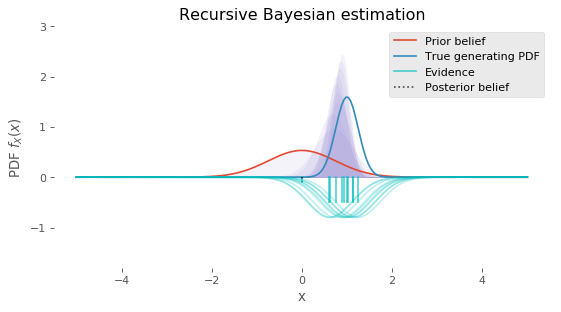

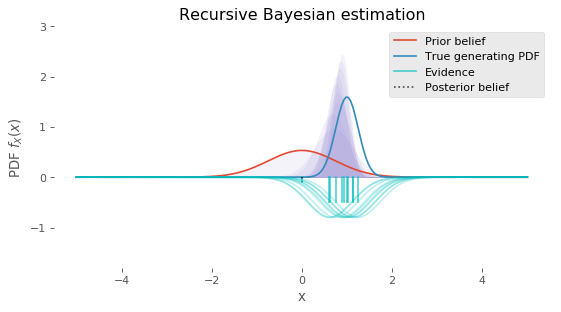

In [14]:
# fast convergence, strong belief in observed evidence, and informative prior
prior_posterior(prior_mean=0, prior_std=0.75, ev_std=0.5, anim=True)

In [ ]:
# weaker prior and less belief in evidence; slower convergence (but still works)
prior_posterior(prior_mean=0, prior_std=3, ev_std=1.0, anim=True)

<IPython.core.display.Javascript object>


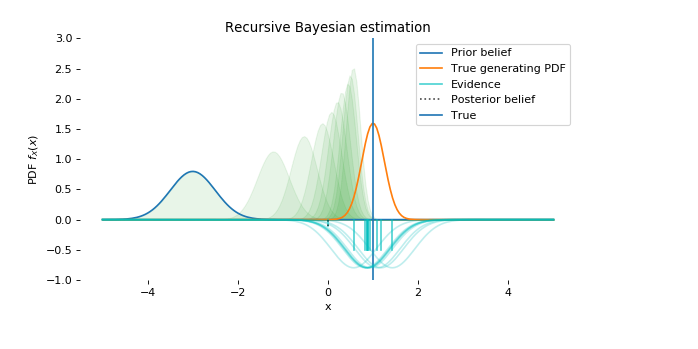

In [13]:
# really bad prior, but this will eventually be forgotten   
prior_posterior(prior_mean=-3, prior_std=0.5, anim=True)

---

# Probabilistic filtering
We will use this recursive form of Bayesian updating to estimate user intentions online. This is a **probabilistic filter**, as described in the introduction.

This filter maintains a state distribution, which is used as prior for the next step of estimation. Evidence is observed, and a posterior is computed; this becomes the prior for the next step, after a **prediction** step is used to align the prior with the known or estimated behaviour.

Unlike other filters, such filters maintain a **distribution** over some hidden variable we are trying to estimate. This makes it possible for them to cope with noise and uncertainty robustly. It also (slightly) complicates their implementation, but their are good models which are readily available.

In HCI, at the very highest level, we want to estimate **state $X_t$** given **sensor observation $Y_t$** $P(X_t|Y_t)$, both of which change over time. 

* **Abstraction** $X_t$ might be expressed across multiple levels of abstraction. For example, "targeting a point", "entering a letter", "entering a command", "opening a file", "rearranging a document"
* **Sensing** $Y_t$ might be distributed over timescales (e.g. immediate cursor information versus learned language model) and over sensor modalities (e.g. combining information from a pose sensor with microphone data to estimate surface contact events).

### Overview diagram


<img src="imgs/control_loop.png">

<a id="terminology"> </a>
## Probabilistic filtering terminology 

Notation:
* We have a sequence of states over time, indexed by $t$
* $X_t$ the variable we want to know (at time $t$) (e.g. an intention inside a user's head). 
* $Y_t$ the variable we can observe (e.g. a sensor we can get readings from).
* For computational simplicity, we assume **discrete time**, i.e. we observe sensors in a discrete, regularly sampled way.

* We want to compute $P(X_t|Y_t)$ (the **inverse problem**). 
* We use a **forward model** $P(Y_t|X_t)$ to infer this.
* We need to define two functions: ${\bf\hat{y_t}} = f({\bf {x}}_t)$ (the **observation function**) and ${\bf x}_{t} = g(\hat{\bf x}_{t-1})$ (the **dynamics** or **process function**).
* We also need to compute the likelihood of the real observation given our model: $p(\bf\hat{y_t}|{\bf y_t})$.

* $f$, $g$ are often very simple functions.

<img src="imgs/stochastic.png" width="75%">

#### Recursive filtering

Probabilistic filters are sometimes called **recursive Bayesian filters**. 
* They are **Bayesian** because they represent belief about states via probability distributions.
* They are **recursive** because they take a *prior*, condition on *evidence* and compute a *posterior*; this *posterior* then becomes the *prior* at the next time step.

As well as straightforward conditioning on observed evidence, probabilistic filters incorporate dynamics which form predictions of the world at the next time step.

#### Predictor-corrector
**This is a predictor-corrector model**; the dynamics model supplies predictions, and corrections to those predictions are applied by the observation model.

## Uses of probabilistic filters
Probabilistic filters are applicable in many HCI tasks, wherever there is a process evolving over time and uncertainty about what users want to do. 

For example, we have used them extensively to track finger configurations when using capacitive sensors. In this case, we have a finger pose state space (hidden) and a sensor matrix (observed), and the filter estimates pose in real-time.

<img src="imgs/finger_track.png">

#### Algorithm
We will use the **particle filter** algorithm (technically the **SIR** variant, which is the simplest to understand).

A particle filter requires that we specify:
* A **dynamics function** $f(\vec{x_t})$ that predicts how we expect the world to evolve, which takes 
${\bf{x}}_t \rightarrow {\bf x}_{t+1}$
* An **observation function**  $g(\vec{x_t})$  that predicts what we expect to observe, given a hypothesized state $\vec{x_t} \rightarrow \hat{\bf{y}_t}$
* A **weight function**, $w(\vec{y_t},  \hat{\vec{y_t}})$ that, given a hypothesized observation $\hat{\bf y}_t$, can be used to compute $p(\hat{\bf y}_t|{\bf y}_t)$. This is performed by computing weights $w_i$ for each particle $i$ and then normalizing to produce a probability:
$$p^{(i)}(\hat{\bf y}_t|{\bf y}_t) = \frac{w_i}{\sum_j w_j}$$
* A set of **prior distributions** that specify our initial guesses for $\bf x_0$

## Simple example: the intermittent slider

We have: 

* A simple 1D slider
* We intermittently observe the position of the slider accurately
* We continuously observe inaccurately the speed (not the velocity) of the slider
* There are two boxes on the slider which represent actions to be performed.

`python intermittent_slider.py`

---

We want to infer -- is the user selecting box 1 or box 2 or neither?

For example, we might have a computer vision system measuring a finger position which tracks badly, and a doppler radar system which reports speed but for some reason cannot report the direction of that movement.

How can we model this? We could assume that the movement has some simple internal dynamics (i.e. the user moves the slider smoothly). This could be as simple as assuming that we have some current velocity of movement, which stays relatively constant. Our internal state is $\vec{x_t} = [x, \dot{x}]$. We infer the probabilities of selecting the options [p_0, p_1, p_2], where $p_0$ is the probability of selecting nothing, and $p_1, p_2$ are the probabilities of selecting option 1 or 2.


We need to define:
* **Prior** a simple assumption is that the slider could be anywhere in its range (e.g. uniformly distributed from 0 to 1) and close to stationary $\vec{x_0} \sim [U(0,1), N(0,0.01)]$. 
* **Observation function** we observe: *either* $[x,v]$ or just $[v]$, where $v = |\dot{x}|$, the absolute value of the velocity. 
* **Dynamics function** we assume that we integrate our velocities over time, and let the position and velocity drift slowly randomly (users might be accelerating or decelerating, or there might be sensor noise). The noise compensates for both aleatoric uncertainty (randomness) and epistemic uncertainty (our model is wrong)
* **Weighting function** we will define a simple weighting function such that we heavily weigh observations of position when we have them, and less heavily weight speed measurements.




In [6]:
def prior(n):    
    """Return n initial draws from the prior over the position
    and velocity of the cursor before any observations have been drawn"""    
    x_prior = np.random.uniform(0, 1, n) # anywhere 0->1
    dx_prior = np.random.normal(0, 0.2, n) # slow movement
    return np.stack([x_prior, dx_prior]).T

In [7]:
def observation(particles):
    """Project from 
    internal state (x, dx) => observed states (x, speed)"""
    
    x = particles[:,0]
    speed = np.abs(particles[:,1])    
    # observations
    return np.stack([x, speed]).T

In [8]:
def dynamics(particles, dt):    
    """Apply our very simple dynamics, with velocity and some
    random noise, and return a new set of particles"""
    
    new_particles = np.array(particles) # copy    
    new_particles[:,0] += particles[:,1] * dt # integrate
    # diffuse
    new_particles += np.random.normal(0, 1, particles.shape) * [2e-2, 1e-3] 
    return new_particles

In [9]:
import numpy.ma as ma
def weighting(hypothesised, real):
    """Compare a set of hypothesised observation values (one) real observation
     and return a unnormalised weighting for each particle"""
    
    # position, speed weights
    # (note: these can be masked and therefore not contribute to the calculation)
    weights = [5000.0, 50.0]
        
    # squared difference, weighted and exponentiated
    # this gives a similarity measure
    difference = ma.sum((hypothesised - real)**2 * weights, axis=1)          
    return np.exp(-difference) 
    

In [10]:
def filter_step(particles, observed, dt=0.01, prior_rate=0.05):
    """Update one complete step given a set of particles
    and an observation.
    
        Steps:
        * Apply dynamics to the particles
        * Compare with observations to get weights
        * Normalise weights
        * Resample particles according to weights
        * Replace a small fraction of particles with 
            prior draws to "refresh" the sampler

    """
    
    
    new_particles = dynamics(particles, dt) # dynamics
    
    # replace a few particles with draws from the posterior
    prior_draws = np.random.uniform(0, 1, len(particles)) < prior_rate        
    new_particles[prior_draws] = prior(np.sum(prior_draws))
        
    weights = weighting(observation(new_particles), observed) # weighting    
    normalised_weights = weights / np.sum(weights)         # normalise weights        
    new_particles = new_particles[pfilter.resample(normalised_weights)]    # resampling        
        
    return new_particles, normalised_weights
    

In [11]:
def expected_position(particles, normalised_weights):
    """Return the expectation of the particle position/speed"""
    return np.sum((particles.T * normalised_weights.T).T, axis=0)


## Sanity checks

### Prior plots


<IPython.core.display.Javascript object>


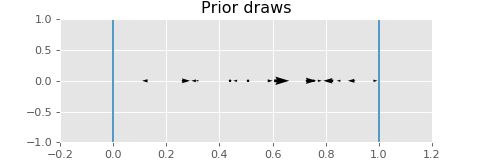

Text(0.5, 1.0, 'Prior draws')

In [12]:
samples = prior(20)


# show 20 random samples from the prior
# should be randomly spread in the range [0,1], with some small initial velocity
    
fig = plt.figure(figsize=(6,2))
ax = fig.add_subplot(1,1,1)
ax.quiver(samples[:,0], 0*samples[:,0], samples[:,1], 0*samples[:,0], units='x',
         scale=10)
ax.axvline(0.0, color='C1')
ax.axvline(1.0, color='C1')
ax.set_xlim(-0.2, 1.2)    
ax.set_ylim(-1,1)
ax.set_title("Prior draws")
    

### Draws from the random process

<IPython.core.display.Javascript object>


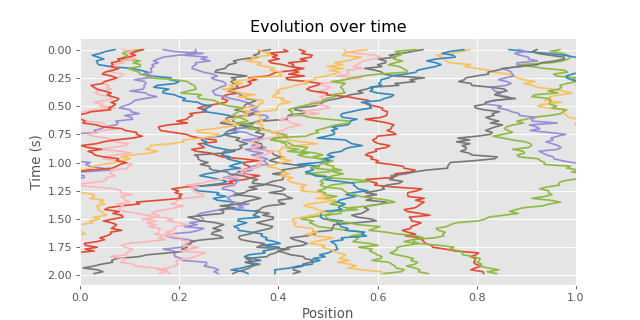

In [10]:
# sampled evolutions, showing the dynamics without
# any sampling process, unconditioned draws from
# the random process
samples = prior(20)

# show 20 random trajectories
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)

trajectories = []
for i in range(120):
    samples = dynamics(samples, 1/60.0)
    trajectories.append(samples)
    
trajectories = np.array(trajectories)


for i in range(len(samples)):
    ax.plot(trajectories[:,i,0], (1/60.0)*np.arange(0, len(trajectories[:,i,0])))
    
ax.set_xlim(0.0, 1.0)
ax.invert_yaxis()
ax.set_xlabel("Position")
ax.set_ylabel("Time (s)")
ax.set_title("Evolution over time");

In [1]:
samples = prior(50)


# show 20 random trajectories
# but this time, we observe a speed of 0.5

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)

for i in range(12):
    # observe just the speed (we mask out the position using NaN)
    observed = ma.masked_invalid([np.nan, 0.5])
    
    # compute the new states and their weights
    samples, weights = filter_step(samples, observed=observed, 
                                   dt=1/6.0, prior_rate=0.05)
    
    ax.quiver(samples[:,0], 
               (1/6.0)*i + 0 * samples[:,0],
              samples[:,1],
              0 * samples[:,0]+0.5,
              scale=20,
              color='C0',
              width=0.005
             )
    
ax.set_xlim(0.0, 1.0)    
ax.set_xlabel("Position")
ax.set_ylabel("Time (s)")
ax.set_title("Evolution over time (fixed speed, free position)");
ax.invert_yaxis()

NameError: name 'prior' is not defined

<IPython.core.display.Javascript object>


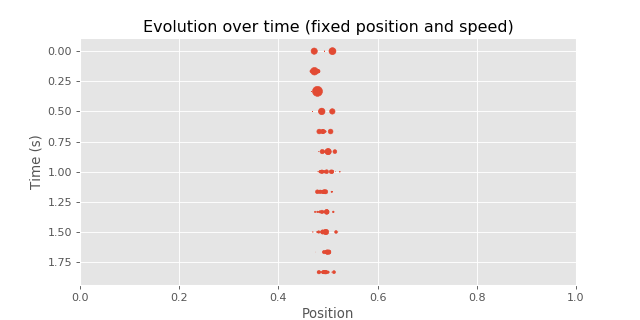

In [14]:
samples = prior(50)


# show 50 random trajectories
# but this time, we observe a static cursor at x=0.5

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)

for i in range(12):
    # observe just the speed
    observed = ma.masked_invalid([0.5, 0.0])
    samples, weights = filter_step(samples, observed=observed, 
                                   dt=1/6.0, prior_rate=0.05)
    
    ax.scatter(x=samples[:,0], 
            y=(1/6.0)*i + 0 * samples[:,0], c='C0', s=weights*100)


    
ax.set_xlim(0.0, 1.0)    
ax.set_xlabel("Position")
ax.set_ylabel("Time (s)")
ax.set_title("Evolution over time (fixed position and speed)");
ax.invert_yaxis()

## Demo

`python intermittent_slider.py --particles`

## What have we done?

* **Dealt with intermittency**: decoupled from real-time, because our model has internal dynamics
* **Represented uncertainty**: we know when control is good and when it is bad
* **Decoded discrete outputs**: we have inferred continuous states, then mapped to a 1 of N choice
* **Fused multiple sensors**: we combined the occasional, precise position measurement with continuous, ambiguous and noisy speed measurement
* **Inferred hidden states**: we never observed or computed velocity, but we were able to update our distribution over possible values regardless.

## Why particle filter?
There are other options for online Bayesian inference. The Kalman filter uses the normal distribution to model all of the uncertainty in the system. This is great for computational efficiency, since the updates are simple linear transforms. It is also inferentially efficient; given only a small amount of evidence the Kalman filter will converge quickly compared to other approaches.

But it has several significant drawbacks, which make it difficult to apply directly to infer *gestures* from observations:

#### Kalman filter drawbacks
* the **dynamics** have to be linear: we can't have complicated dynamic models (although we can linearise at each time step).

This doesn't make much sense for tracking complex gesture trajectories; a dynamic model for a complete gesture is rarely going to be linear. We might want to be able to learn complex dynamics using a deep network, for example, and then plug them into a probabilistic filter. A Kalman filter does not support this.

* all of the **uncertainty** must be normal: so we can't track multiple modes, for example, because a normal distribution has exactly one mode. 

Imagine an object disappearing behind an obstruction which could reappear on either side; the Kalman filter can only spread out the distribution over the whole area, with an expected location in the middle of the obstacle! We would like to instead be able to track the two possibilities here by splitting up the hypotheses. 

<img src="imgs/landscape.png" width="50%">

*[Waddington's epigenetic landscape, illustrating a dynamic system which develops multiple modes as it evolves; a Gaussian approximation is wholly inappropriate]*

Very often in HCI we encounter problems with a combination of discrete variables and continuous ones.
This is critical in gesture recognition for example; at any point in time, our hypotheses might be split among multiple possible gestures with different spatial distributions. Being able to represent the combination of discrete + continuous states is critical. (**Kalman filter banks** are an alternative approach, which explicitly maintain the competing hypotheses as separate Kalman filters).

As an aside, the **hidden Markov model**, formerly a key algorithm in speech recognition, is to discrete state tracking what the Kalman filter is to continuous state tracking. The HMM can track discrete hidden states easily (with discrete or continuous observation space), but cannot track continuous variables on its own.

## Gesture recognition
Lets now apply these ideas to a practical HCI task: recognising 2D gestures. We will try and  do the full set of gesture recognition tasks is one single, probabilistic model:
* **spot** gestures: determine when they start and end, without any external segmentation cue like a button push.
* **recognise** gestures: label them according to class
* **parameterise** gestures: recover parameters like the size, speed or rotation of the gestures performed.

This is a challenging task! We will assume a small set of Graffiti-like symbols as the basis for this example.

We will base our algorithm directly on the one given in [A Probabilistic Framework for Matching
Temporal Trajectories](http://www.cs.toronto.edu/~jepson/papers/BlackJepsonECCV1998.pdf).

# Challenge
We want to recognize 2D gestures drawn with a mouse (or finger/stylus). 


### A generative model

Our "story" of how observations arise is:

* A user imagines a prototype gesture (a particular spatial form).
* They recruit their motor system to begin closed-loop control of an on-screen cursor.
* This begins at some arbitrary screen-space start-point (the origin)
* The movement is executed by moving the cursor in space to approximately follow the path of the prototypical gesture shape, with some distorted version of the template (rotated, stretched, noise added, velocity variation). 
* This is measured as a sequence of cursor positions.
* At some point, the user completes the movement and the gestural movement ceases.

---


### We know:
* We *observe* sequences of $x,y$ coordinates over time.
* We have some example templates for particular shapes that we want to match (e.g. letters)
* We have some prior distribution over all of our parameters.

### We don't know:
* **origin** Where the user will start drawing a gesture 
* **scale** how big the gesture will be    
* **rotation** how the performed gesture is rotated relative to the reference frame
* **velocity** how fast the user will draw the gesture (it may well be drawn at a non-constant speed)

We will also observe noise in the production of the gesture, inducing both random spatial and temporal variation.

### We want to know:
* **class** which gesture the user is performing, if any
* **segmentation** the start and end time points of the gesture
* **parametric representations** like average speed of performance

----- 
    
#### Probabilistic view
Putting this into the probabilistic framework, we want to infer a probability distribution over gesture classes and gesture completion state, given a time series of $x,y$ coordinates. The $x,y$ points form our observation vector $Y$.

We assume gesture reproduction is in some way a "noisy reproduction" of the ideal template form, where there are various types of distortion that can be encountered. The sensing we have and the human motor system influence the production of a gesture, either communicating intentional variation ("a rapid gesture") or random variation (e.g. from finger tremor).



#### Markov approximation
We could look at the whole time series of $x,y$ points and try and classify that. However, there are two problems:

* What is the "whole" time series -- i.e. how do we segment the gesture?
* We would have to store the entire series and somehow match it against templates.

A simple way to eliminate these problems is to rewrite the recognizer so that it depends on nothing but its immediately previous state; i.e. so that it satisfies the Markov property.

To do this, we need to introduce additional variables into the state we are estimating, but with judicious choice these can be a very small number of additional variables. In particular, we can just track how far along a gesture we are (the "phase") and update that over time. 

## Data
We have some example data with a few example 2D mouse-drawn gestures. Here we are assuming just a **single** template for each gesture, for simplicity. This is a very narrow prior on the template forms. We could have formed a better prior that spans by:

* averaging over multiple repetitions with some sensible combination function that aligns timing, (more robust but does not capture uncertainty) or
* forming an approximate distribution over paths (e.g. by fitting Gaussian processes to repetitions of the templates), or
*  just kept multiple repetitions and chosen exemplars randomly in the sampling process (easy and captures uncertainty well but inferentially inefficient).

In [15]:
g = gestures.GestureData("data/gestures.txt")

## Gesture shapes 
We can plot the shapes of the gesture trajectories.

<IPython.core.display.Javascript object>


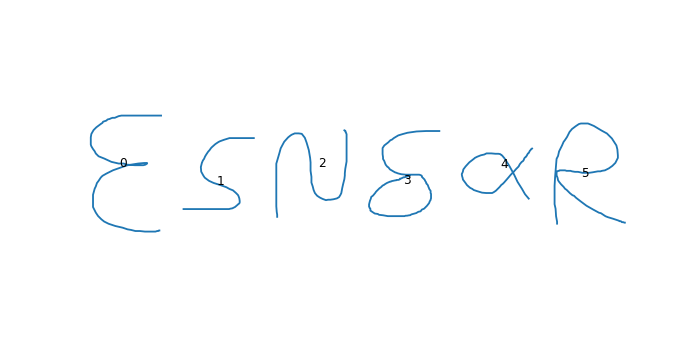

In [17]:
n_gestures = g.n_gestures
# plot the 2D curves
plt.figure()
for i in range(n_gestures):
    plt.subplot(1, n_gestures,i+1)
    path = g.gestures[i]    
    plt.plot(path[:,0], -path[:,1])
    plt.text(0,0,"%d"%i)
    plt.axis("off")
    plt.axis("equal")

## Timeseries view
We can also see each gesture as a trajectory of two coordinates ($x,y$ coordinates) over time. This is closer to the way in which the matching will work.

<IPython.core.display.Javascript object>


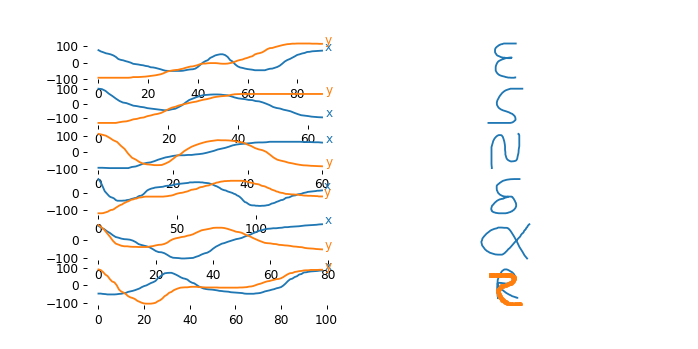

In [18]:
plt.figure()
for i in range(n_gestures):
    ax = plt.subplot(n_gestures,2,i*2+1)    
    path = g.gestures[i]    
    ax.plot(path[:,0], '-C0')
    ax.plot(path[:,1], '-C1')
    ax.text(len(path), path[-1,0], 'x', color='C0')
    ax.text(len(path), path[-1,1], 'y', color='C1')
    ax.set_frame_on(False)
    
    
    ax = plt.subplot(n_gestures,2,i*2+2)
    ax.plot(path[:,0], path[:,1], 'C0')
    ax.invert_yaxis()
    ax.axis("equal")
    ax.axis("off")
plt.subplots_adjust()

## get_template
We have a simple utility function `get_template(i, t)` which returns the $x,y$ co-ordinate for gesture $i$ at sample $t$. It automatically clips $t$ from 0 to the length of the gesture (in frames).

<IPython.core.display.Javascript object>


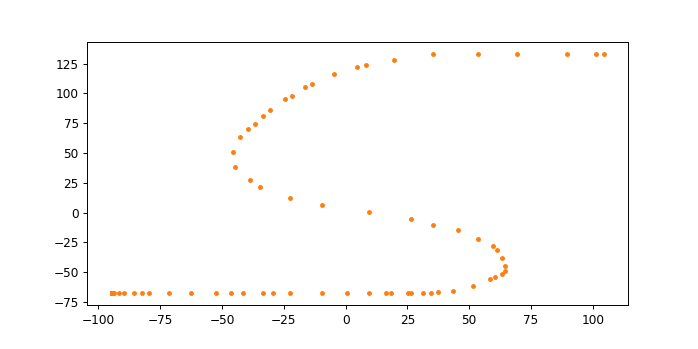

In [20]:
# test get_template
plt.figure()
for i in range(100):
    xy = g.get_template(1, i)
    plt.plot(xy[0], -xy[1], 'C1.')

We are now in a position to write down a model for our gesture recognizer.

### State
First of all, the state we are trying to infer:

<img src="imgs/gesture.png">

$$X = [i,s,x_c,y_c,\theta,\phi,\dot{\phi}]$$

We have one of $n$ possible gestures
* **class** $i$ the class index of the gesture (i.e. which prototype)

Our model says a gesture will be identical to the template for that class of gesture, but might vary in:
* **scale** $s$ overall scale, within some tolerance
* **origin** $x_c,y_c$ center position (could be anywhere on screen)
* **rotation** $\theta$ small changes in rotation (e.g. $<45^o$)

We must take note that what we observe is a position at a **single time point** in a gesture. This means we must estimate how far through a gesture we are.
* **phase** $\phi$ the proportion of gesture complete, in the fraction [0,1].
* **velocity** $\dot{\phi}$ the rate at which the gesture is being performed (i.e. fast or slow).



#### Observation

* Given a gesture $i$, we have a template $G_i(\phi)$, which is returns an $x,y$ point for any value of $\phi$.

* We expect to observe $\hat{{\bf y}}=AG_i(\phi)$, where $A$ is a transformation matrix applying the translation $x_c,y_c$, the scaling $s$ and the rotation $\theta$.

* The utility function `linear_transform()` defined below is a useful component in implementing this:

In [21]:

def linear_transform(xys, angle=0.0, scale=1.0, translate=(0,0)):
    """Takes a an n x 2 array of point `xys` and returns the 2D points transformed by
    rotating by `angle` (degrees)
    scaling by `scale` (proportional 1.0=no change, 0.5=half, etc.)
    translating by `translate` ((x,y) offset)"""
    ca, sa = np.cos(np.radians(angle)), np.sin(np.radians(angle))
    rot = np.array([[ca, -sa], 
                    [sa, ca]])
    return np.dot(xys, rot)*scale + np.array(translate)
    

In [268]:
def gesture_observation(state):
    # given an n x d matrix of n particle samples
    # return a n x 2 matrix of expected x,y, positions for that gesture model    
  
    transformed = [linear_transform(g.get_template(s[0], s[5]), scale=s[1], angle=0, 
                                      translate=[s[2], s[3]]) for s in state]                 
                     
    return np.array(transformed)

## Key functions
We need to define our functions:

* $f(\vec{x_t}) \rightarrow x_{\vec{t+1}}$ dynamics/transition function
* $g(\vec{x_t}) \rightarrow \vec{y_t}$ observation function
* $\pi(\vec{x_0}) \rightarrow \real $ prior distribution over initial states, that we can sample from
* $w(\hat{\vec{y_t}}, \vec{y_t})$ a weighting/scoring function that computes the similarity of two hypothesied observations

## $\pi(\vec{x_0})$ Priors
We then define our initial guesses for the state of the system, encoded as prior probability distributions.

* $s_0 \sim N(1,0.25)$, should be around original size, with some latitude
* $x_0,y_0 \sim U(0,\text{max_screen_size})$, could be anywhere on screen
* $\theta_0 \sim N(0,10)$, angle will be close to original, with std. dev. of ~15 degrees
* $\phi_0 \sim  N(0,0.1)$, gestures will begin close to their start
* $\dot{\phi}_0 \sim  N(\mu_{\dot{\phi}}, \sigma_{\dot{\phi}}))$, gesture speeds will be distributed according to the observed speeds from the template
* $i_0$ discrete $U(0,n-1)$, could be any gesture

In [269]:
def gesture_prior(n):
    # return an n x d matrix with columns [i, s, x_c, y_c, \theta, \phi, \phi_dot] as an initial guess
    # these should call a function draw a value from a distribution
    # dummy code: choose a random class and set all other variables to 1.0
    return np.stack([
        np.random.randint(0,n_gestures,size=n), 
        np.random.normal(1.0,0.25,size=n), 
        np.random.uniform(-200,400,size=n), 
        np.random.uniform(-200,400,size=n),
        np.random.normal(0.0, 10.0, size=n), 
        np.random.normal(0.0, 10, size=n), 
        np.random.normal(1.0, 0.03, size=n)]).T


## Samples from our prior 
We can sample prototypes from our prior. This is an important step in sanity checking our model, and is one of the advantages of a generative modelling approach. These should look like realistic variations of gestures that we might expect to see. The reproduction will be perfect under the initial constraints, as we will just be reproducing the template with different fixed parameterisations.

<IPython.core.display.Javascript object>


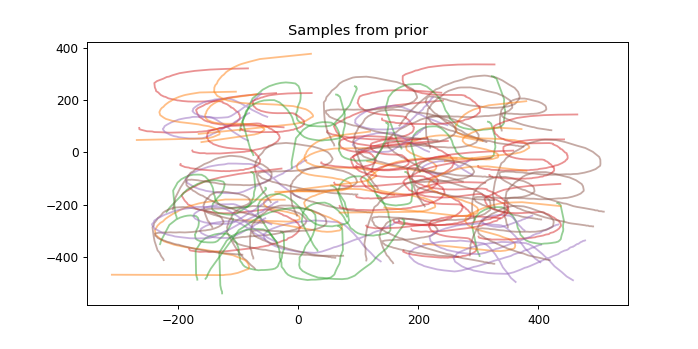

Text(0.5, 1.0, 'Samples from prior')

In [270]:
# test get_template
plt.figure()

test_priors = gesture_prior(100)
for prior in test_priors:
    class_ix = prior[0]
    scale, x, y, theta = prior[1:5]
    
    template = np.array([g.get_template(class_ix, j) for j in range(100)])
    sample_gesture = linear_transform(template, angle=theta, scale=scale, translate=(x,y))
    plt.plot(sample_gesture[:,0], -sample_gesture[:,1], f'C{class_ix:.0f}', alpha=0.5)
    
plt.title("Samples from prior")

<IPython.core.display.Javascript object>


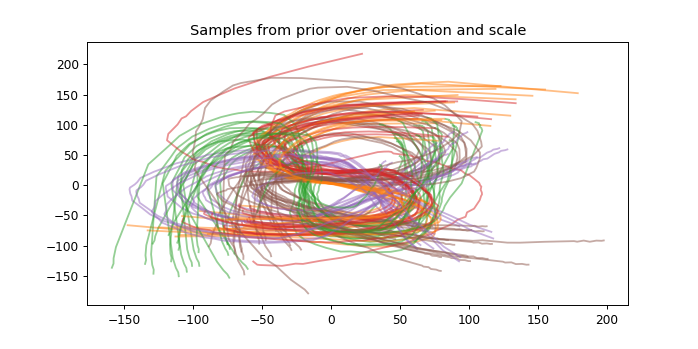

Text(0.5, 1.0, 'Samples from prior over orientation and scale')

In [271]:
# test get_template
plt.figure()

test_priors = gesture_prior(100)
for prior in test_priors:
    class_ix = prior[0]
    scale, x, y, theta = prior[1:5]
    
    template = np.array([g.get_template(class_ix, j) for j in range(100)])
    # fix the offset to 0, just vary scale and rotation
    sample_gesture = linear_transform(template, angle=theta, scale=scale)
    plt.plot(sample_gesture[:,0], -sample_gesture[:,1], f'C{class_ix:.0f}', alpha=0.5)
    
plt.title("Samples from prior over orientation and scale")

## f(x): Dynamics
We then specify some simple dynamics. These all allow the values to slowly change over time (i.e. some random drift), except for the phase $\phi$ which we also expect to steadily increase at the rate $\dot{\phi}$.

Specifically:
* $s_{t+1} = s_{t} + \sigma_s$ scale can drift slowly
* $x_{t+1} = x_{t} + \sigma_x$ position can drift slowly
* $y_{t+1} = y_{t} + \sigma_y$ position can drift slowly
* $\theta_{t+1} = \theta_{t} + \sigma_\theta$ orientation can drift slowly
* $i_{t+1}=i_{t}$  gesture class never changes
* $\phi_{t+1} = \phi_{t} + \dot{\phi}_{t} + \sigma_y$ progress is steady, with some drift
* $\dot{\phi}_{t+1} = \dot{\phi}_{t} + \sigma_y$ progress rate can drift


In [266]:

def gesture_dynamics(prev_states):
    # take an n x d array of particle samples
    # return an n x d array representing the next states    
    next_states = np.array(prev_states)
    
    #              class, scale, x,   y,   rotation, phase, velocity
    noise_vector = [0.0,  0.01, 1.0, 1.0, 2.5,      3.0,   0.002] 
    # add noise
    next_states += np.random.normal(0, 1, next_states.shape) * noise_vector
    # integrate velocity
    next_states[:,5] += next_states[:,6]
            
    return next_states

## Sampling dynamics: prior evolutions
And we can sample evolutions of our prototypes given our dynamics. This lets us evaluate how realistic our proposed model of gesture generation is. 

<IPython.core.display.Javascript object>


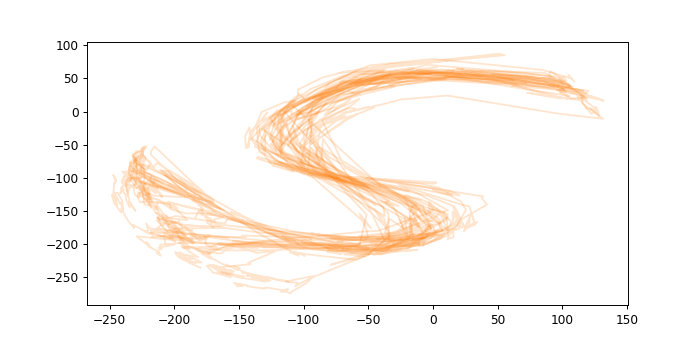

In [256]:
    
# test get_template
plt.figure()


original_states = gesture_prior(1) 
for i in range(20):
  states = np.array(original_states)
  k = 0
  trajectory = []
  for j in range(100):
        states = gesture_dynamics(states)        
        class_ix, scale, x, y, theta, phase, velocity = states[0]   
        
        template = np.array([g.get_template(class_ix, phase)])
        sample_gesture = linear_transform(template, angle=theta, scale=scale, translate=(x,y))
        trajectory.append(sample_gesture)
  trajectory = np.array(trajectory)
    
  plt.plot(trajectory[:,0,0], -trajectory[:,0,1], f'C{class_ix:.0f}', alpha=0.2)

### $w(y_t, \hat{y_t})$:  Weighting function
We can use the simple heat kernel (or RBF) to measure similarity between expected and observed observations:
$$w_i = w(\vec{y_t}^{(i)}, \hat{\vec{y_t}^{(i)}}) =  e^{\left(-\frac{(\vec{y_t}^{(i)}-\hat{\vec{y_t}^{(i)}})^2}{2\beta^2}\right)}$$
(the specific choice of weighting  function is rarely very important, except if there are particularly unusual states to be compared)

In [2]:
def gesture_weight(hypothesized, true):
    # take a 2D observation (x,y)
    # and an n x 2 matrix of observation samples (returned from gesture_observation())
    # return the weight for each, representing how similar they are
    gesture_beta = 180.0          # the RBF width
    
    # RBF similarity function       
    w = np.exp(-np.sum((hypothesized-true)**2, axis=1)/(0.5*gesture_beta**2))
    return w

`python gestures.py`

### Pitfalls
Particle filter in particular can be tricky to tune. 

* As the state space expands (i.e. the number of variables tracked), the number of particles requires can increase. This makes it difficult to run filters efficiently in problems that have lots of degrees of freedom.



# Outlook
---------------------
### Scope and limitations
#### Scope
* Probabilistic filters can be applied to many problems in HCI. Typically, if a process unfolds over time and there is uncertainty, a probabilistic filter is a strong candidate for inference. 

* The fact that inference is performed over time is a potential advantage over "static" classification approaches, as feedback can be generated on the fly, instead only after completion of an action. 

* In the specific context of gestures, the ability to infer the start and endpoint of gestures can solve the "segmentation problem" or "gesture spotting problem" that is often awkward and leads to kludges like button presses to segment actions.

* Probabilistic motion models can easily be linked to higher-order probabilistic models which infer long-term actions on the part of the user. Because everything is a probability distribution, there is a simple common basis for integrating such models. This, for example, can include language models which estimate a distribution over text that is likely to be entered given both user input and a statistical model of language.

#### Limitations
* PFs can be computationally intensive to run. 
* Curse-of-dimensionality can make the attractive simplicity of PFs work poorly in practice as the state space expands (although often better than you might expect).
* Sometimes the inverse probability model can be hard to formulate. Conversely, it is sometimes very much easier.
* Particle filters are simple and elegant, but inferentially weak.
* Kalman filters are rigid and restrictive, but very inferentially efficient.
* Hybrid approaches (Ensemble Kalman filter, Unscented Kalman Filter, hybrid particle/Kalman filters, Rao-Blackwellized filters) can trade these qualities off, but they aren't off the shelf solutions (i.e. you need an expert!).


### Resources
#### Basic
* Read the [Condensation paper](http://vision.stanford.edu/teaching/cs231b_spring1415/papers/isard-blake-98.pdf).
* Read [the Kalman filter in pictures](http://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/)
* Watch [the particle filter without equations](https://www.youtube.com/watch?v=aUkBa1zMKv4)

#### Advanced
* [A technical but succinct and clear explanation of the particle filter](http://www.cns.nyu.edu/~eorhan/notes/particle-filtering.pdf)
* [A bibliography of particle filter papers](http://www.stats.ox.ac.uk/~doucet/smc_resources.html)



------
### Future of probabilistic filtering

#### Learned models

Much use of probabilistic filters has depended on strong mathematical models of the fundamental process. For example, in rocket science, sophisticated physics models were used to specify the Kalman filters used for stable control. 

However, it is becoming increasingly possible to **infer** these models from observations. Techniques such as deep learning (for example variational autoencoders or generative adversarial networks) make it possible to learn very sophisticated *generative models* from observations of
data.  These models can be dropped into probabilistic filters to produce robust inferential engines for user interaction.

##### Example
As an illustrative example, we recently built a touch pose estimator to estimate the pose of a finger from a capacitive sensor array (as found on a touch screen). We trained DCNN to predict finger pose from sensor images (inverse model), a separate deconvolutional CNN to predict sensor images from finger poses (forward model) and then fused these using a particle filter.

<img src="imgs/fwd_inv.png">
This combined gives substantial robustness, and we were able to introduce a simple dynamics model, which filters out completely implausible movements.

